In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

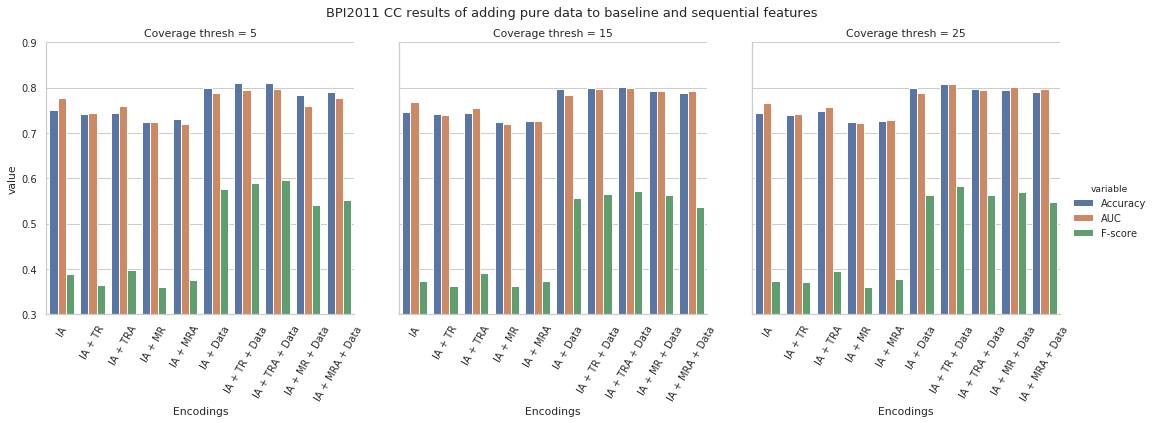

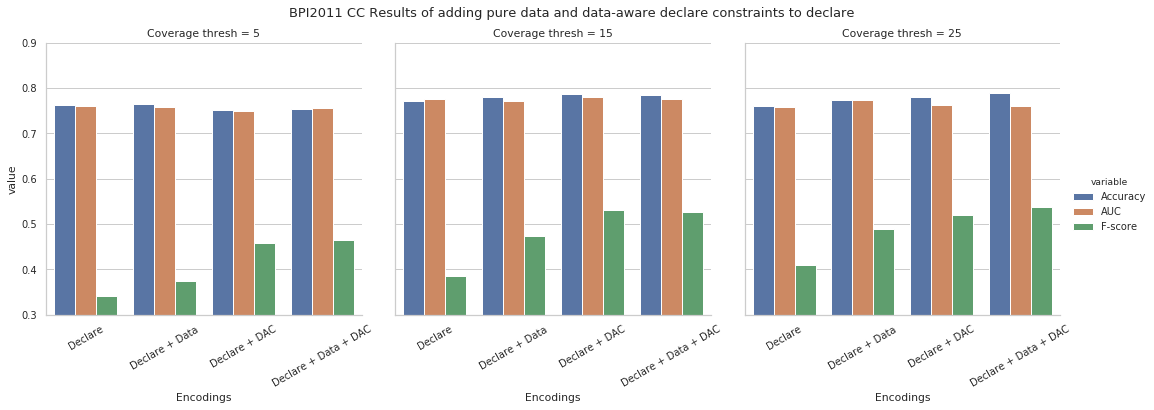

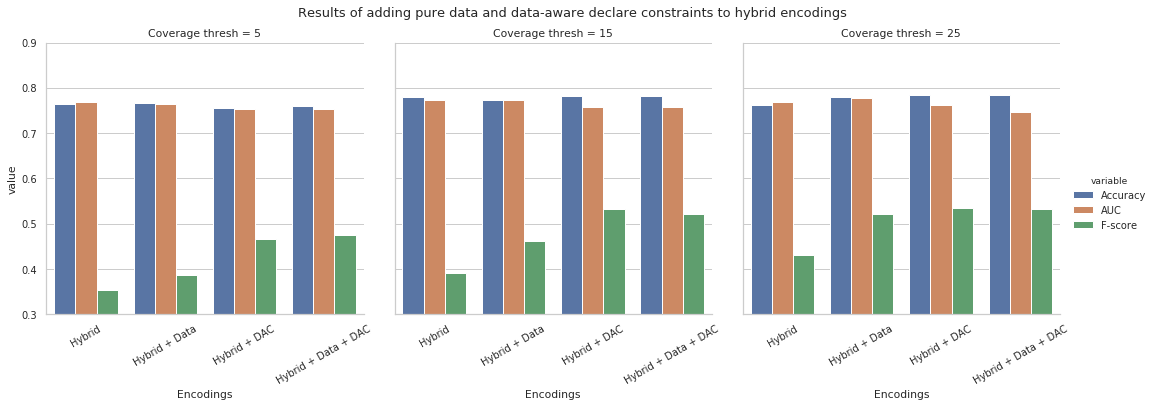

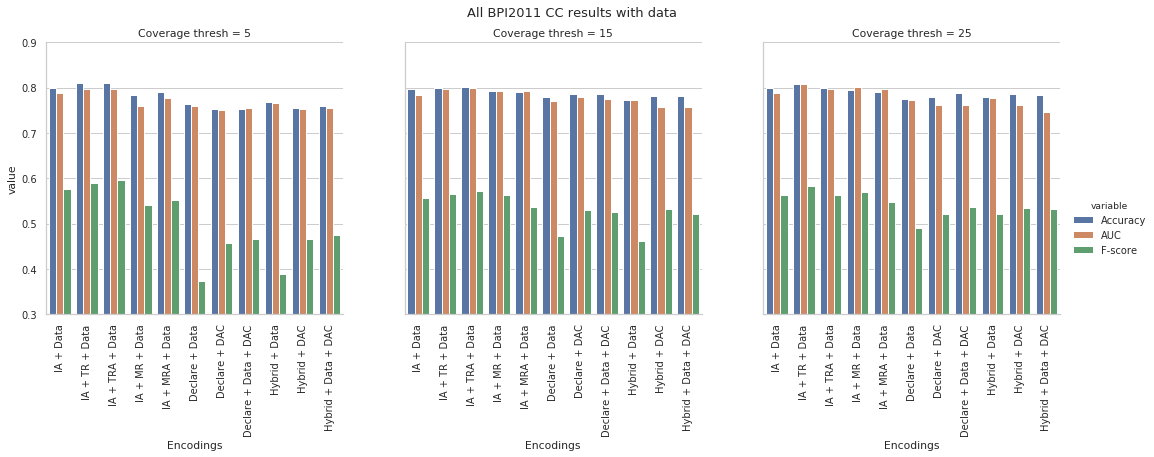

/home/joonas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/joonas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/joonas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

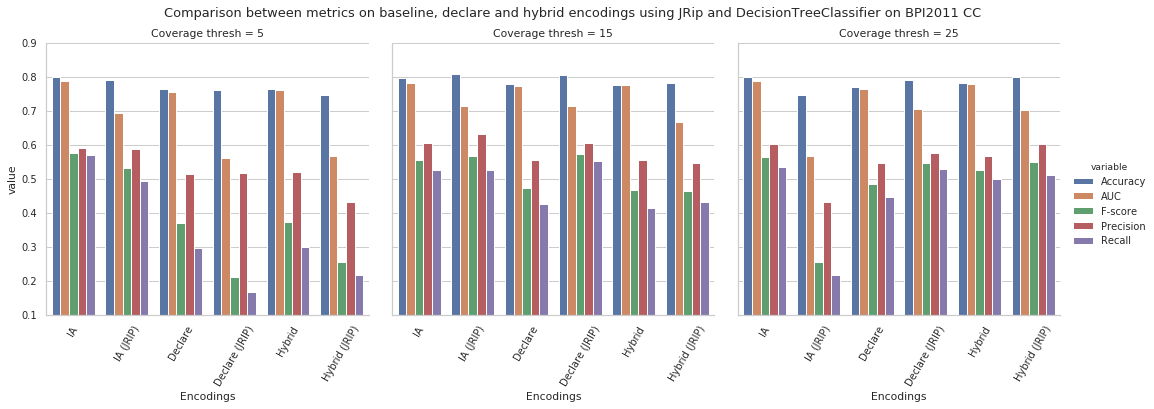

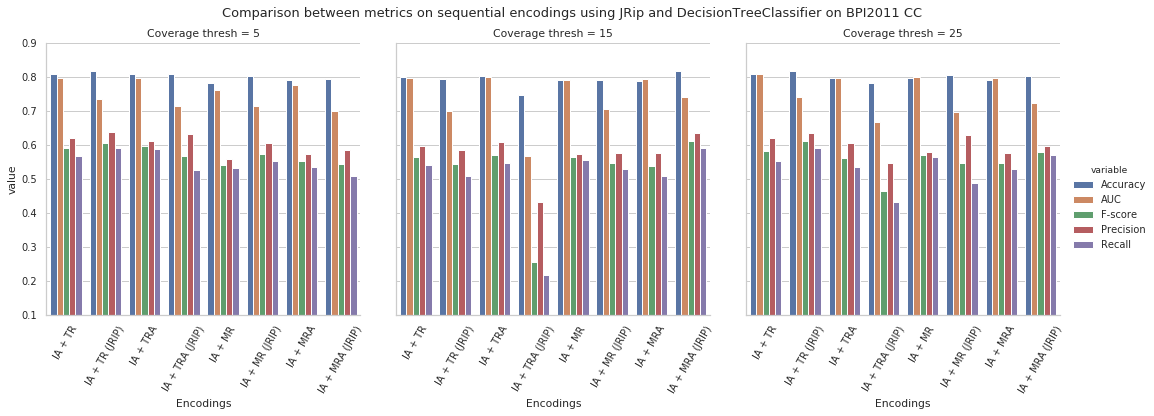

In [2]:
data_csv = "Downloads/bpi2011cc_data3.csv"
dwd_csv = "Downloads/bpi2011cc_dad.csv"
normal_csv = "Downloads/bpi2011cc.csv"
jrip_csv = "Downloads/bpi2011cc_data_jrip.csv"


sns.set()

sns.set_style("whitegrid")


bpi2011cc = pd.read_csv(normal_csv)
kept2011cc = bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]

data_bpi2011cc = pd.read_csv(data_csv)
data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]

res = pd.concat([kept2011cc, data_kept2011cc])


# Compare Seq + IA
seq_features = ["IA", "IA + Data", "IA + TR", "IA + TR + Data", "IA + TRA", "IA + TRA + Data", 
                "IA + MR", "IA + MR + Data", "IA + MRA", "IA + MRA + Data"]
#sns.set_style("dark")
seq_comparison = res[res.Encodings.isin(seq_features)]
sns.set(font_scale=0.9)  # crazy big
#ia_comparison = ia_comparison.set_index(["Encodings", "Coverage thresh"])

seq_melted = pd.melt(seq_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])
sns.set_style("whitegrid")

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=seq_melted, kind="bar", row_order=seq_features)
ax.set(ylim=(0.3, 0.9))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 CC results of adding pure data to baseline and sequential features')
plt.show()


data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#kept = kept.set_index(["Encodings", "Coverage thresh"])


declare_features = ["Declare", "Declare + Data", "Declare + DAC", "Declare + Data + DAC"]
#sns.set_style("dark")
declare_comparison = kept[kept.Encodings.isin(declare_features)]

declare_melted = pd.melt(declare_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=declare_melted, kind="bar")
ax.set(ylim=(0.3, 0.9))
ax.set_xticklabels(rotation=30)

#plt.tight_layout()

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 CC Results of adding pure data and data-aware declare constraints to declare')
plt.show()

data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#kept = kept.set_index(["Encodings", "Coverage thresh"])


declare_features = ["Hybrid", "Hybrid + Data", "Hybrid + DAC", "Hybrid + Data + DAC"]
#sns.set_style("dark")
declare_comparison = kept[kept.Encodings.isin(declare_features)]

declare_melted = pd.melt(declare_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=declare_melted, kind="bar")
ax.set(ylim=(0.3, 0.9))
ax.set_xticklabels(rotation=30)

#plt.tight_layout()

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('Results of adding pure data and data-aware declare constraints to hybrid encodings')
plt.show()




# Compare Seq + IA
seq_data_features = ["IA + Data", "IA + TR + Data", "IA + TRA + Data", 
                     "IA + MR + Data", "IA + MRA + Data"]

hybrid_data_features = ["Declare + Data", "Declare + DAC", "Declare + Data + DAC", 
                        "Hybrid + Data", "Hybrid + DAC", "Hybrid + Data + DAC"]



#res_new = pd.concat([kept2011cc, data_kept2011cc])


# 1 baseline, 4 from sequential, 3 from declare, 3 from hybrid, 11 columns?


data_bpi2011cc = pd.read_csv(data_csv)
data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
keep_seq = data_kept2011cc[data_kept2011cc.Encodings.isin(seq_data_features)]

data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
keep_hybrid = kept[kept.Encodings.isin(hybrid_data_features)]


concated = pd.concat([keep_seq, keep_hybrid])

concated_melted = pd.melt(concated, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=concated_melted, kind="bar")
ax.set(ylim=(0.3, 0.9))
ax.set_xticklabels(rotation=90)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('All BPI2011 CC results with data')
plt.show()


data_jrip = pd.read_csv(jrip_csv)

data_keptjrip = data_jrip[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
data_keptjrip = data_keptjrip[data_keptjrip.Encodings.isin(seq_data_features)]





feats_1_norip = ["IA + Data", "Declare + Data", "Hybrid + Data"]
feats_2_norip = ["IA + TR + Data", "IA + TRA + Data", 
           "IA + MR + Data", "IA + MRA + Data"]


norip_kept = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC", "Recall", "Precision"]]

norip_data_feats1 = norip_kept[norip_kept.Encodings.isin(feats_1_norip)]
norip_data_feats2 = norip_kept[norip_kept.Encodings.isin(feats_2_norip)]

norip_data_feats1["Encodings"] = norip_data_feats1.Encodings.str.replace(' + Data' , '', regex=False)
norip_data_feats2["Encodings"] = norip_data_feats2.Encodings.str.replace(' + Data' , '', regex=False)



#data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#keep_seq = data_kept2011cc[data_kept2011cc.Encodings.isin(seq_data_features)]



data_jrip = pd.read_csv(jrip_csv)
data_jrip["Accuracy"] = data_jrip["Accuracy"] / 100
data_jrip["Accuracy std"] = data_jrip["Accuracy std"] / 100

data_keptjrip = data_jrip[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC", "Recall", "Precision"]]

feats_1 = ["IA + Data (JRIP)", "Declare + Data (JRIP)", "Hybrid + Data (JRIP)"]
feats_2 = ["IA + TR + Data (JRIP)", "IA + TRA + Data (JRIP)", 
           "IA + MR + Data (JRIP)", "IA + MRA + Data (JRIP)"]


data_feats1 = data_keptjrip[data_keptjrip.Encodings.isin(feats_1)]
#data_feats1

data_feats2 = data_keptjrip[data_keptjrip.Encodings.isin(feats_2)]
#data_feats2


data_feats1["Encodings"] = data_feats1.Encodings.str.replace(' + Data' , '', regex=False)
data_feats2["Encodings"] = data_feats2.Encodings.str.replace(' + Data' , '', regex=False)


sns.set(font_scale=0.9)
sns.set_style("whitegrid")

concated = pd.concat([norip_data_feats1, data_feats1])

concated_melted = pd.melt(concated, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score", "Precision", "Recall"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=concated_melted, kind="bar",
                order=["IA", "IA (JRIP)", "Declare", 
                       "Declare (JRIP)","Hybrid","Hybrid (JRIP)"])
ax.set(ylim=(0.1, 0.9))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('Comparison between metrics on baseline, declare and hybrid encodings using JRip and DecisionTreeClassifier on BPI2011 CC')
plt.show()



concated = pd.concat([norip_data_feats2, data_feats2])

concated_melted = pd.melt(concated, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score", "Precision", "Recall"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=concated_melted, kind="bar",
                order=["IA + TR","IA + TR (JRIP)", "IA + TRA", "IA + TRA (JRIP)", 
           "IA + MR", "IA + MR (JRIP)", "IA + MRA", "IA + MRA (JRIP)"])
ax.set(ylim=(0.1, 0.9))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('Comparison between metrics on sequential encodings using JRip and DecisionTreeClassifier on BPI2011 CC')
plt.show()




# M13



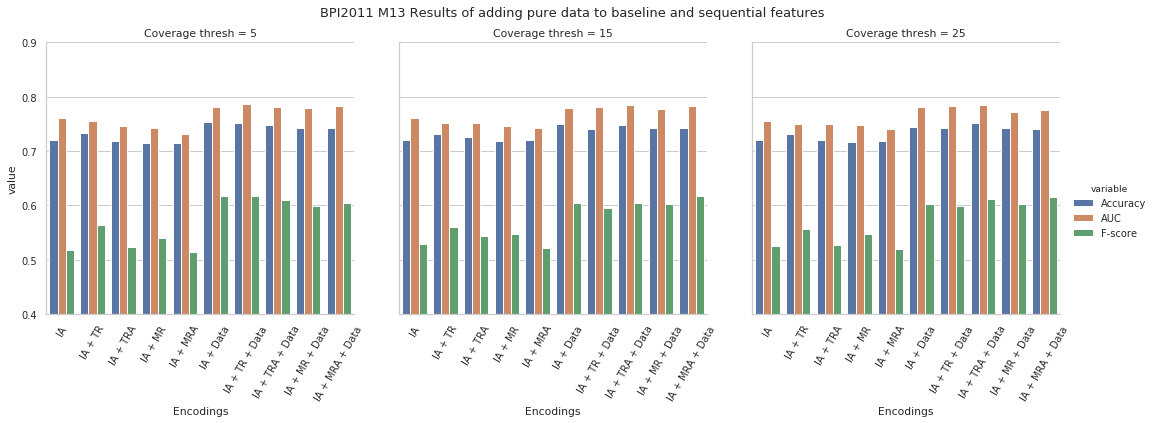

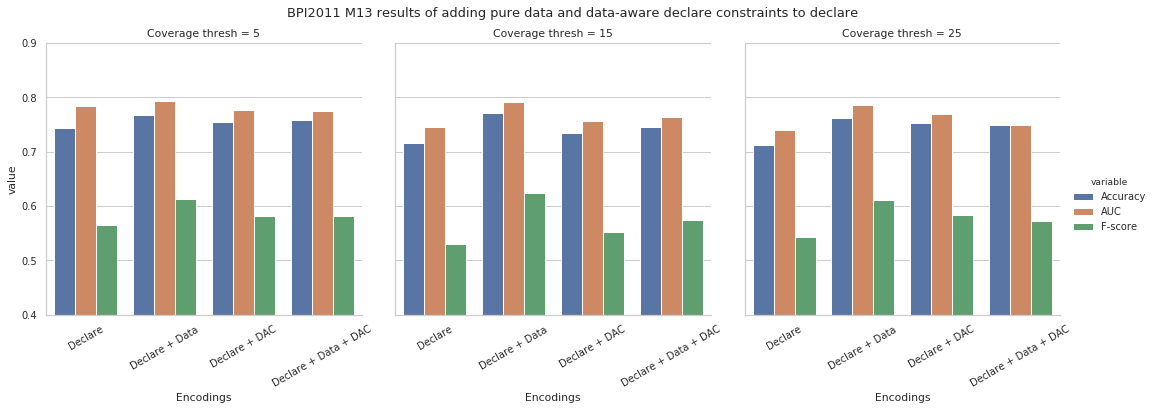

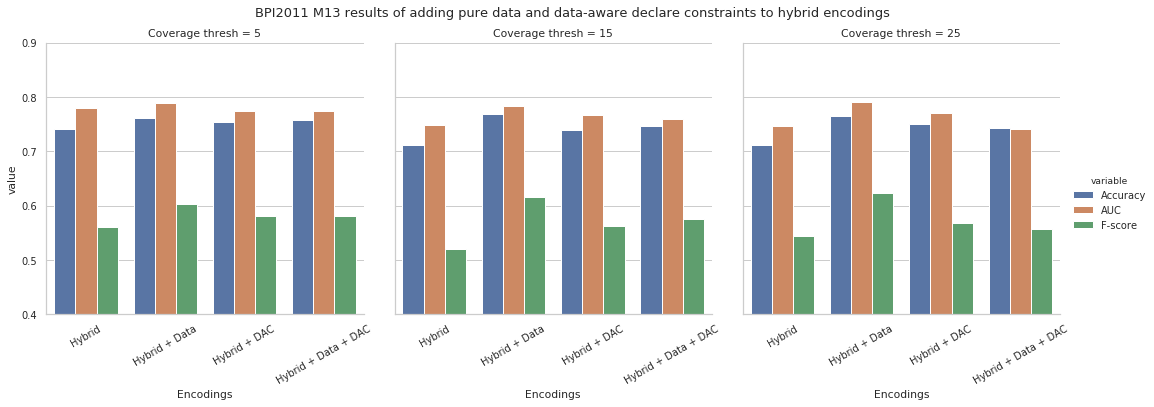

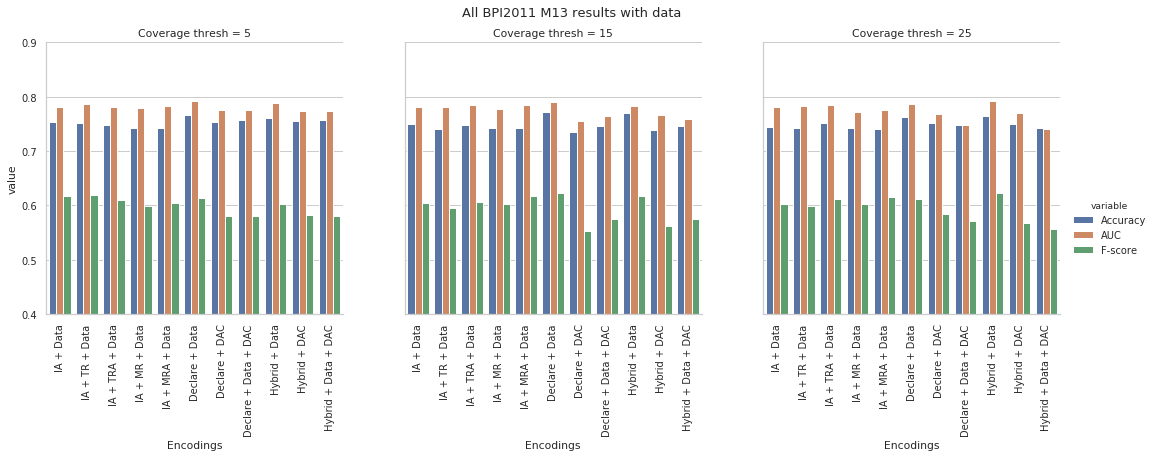

/home/joonas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/joonas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/joonas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

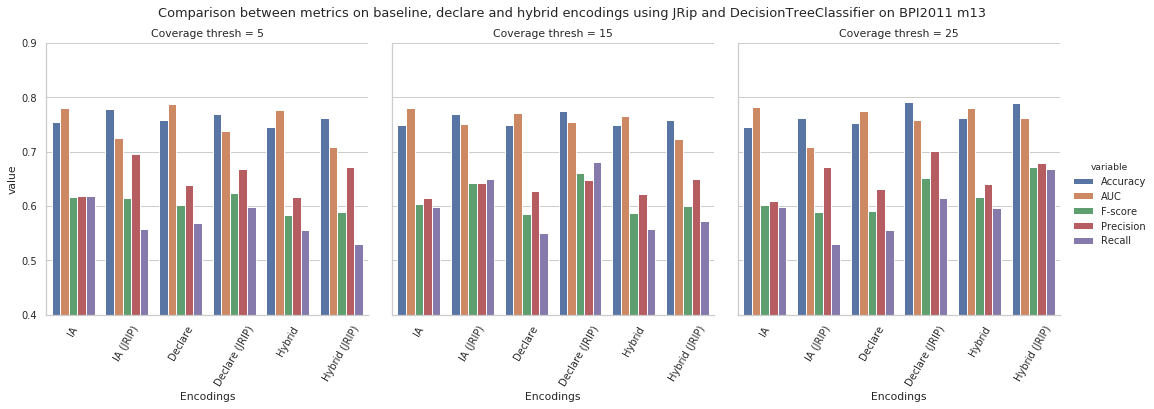

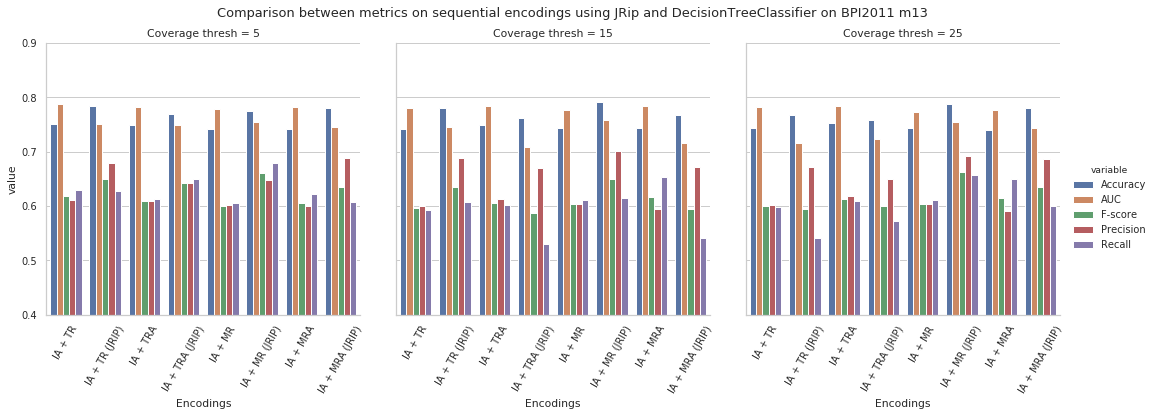

In [7]:
data_csv = "Downloads/bpi2011m13_data.csv"
dwd_csv = "Downloads/bpi2011m13_dad.csv"
normal_csv = "Downloads/bpi2011m13.csv"
jrip_csv = "Downloads/bpi2011m13_data_jrip.csv"

sns.set()

sns.set_style("whitegrid")

bpi2011cc = pd.read_csv(normal_csv)
kept2011cc = bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]

data_bpi2011cc = pd.read_csv(data_csv)
data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]

res = pd.concat([kept2011cc, data_kept2011cc])


# Compare Seq + IA
seq_features = ["IA", "IA + Data", "IA + TR", "IA + TR + Data", "IA + TRA", "IA + TRA + Data", 
                "IA + MR", "IA + MR + Data", "IA + MRA", "IA + MRA + Data"]
#sns.set_style("dark")
seq_comparison = res[res.Encodings.isin(seq_features)]
sns.set(font_scale=0.9)  # crazy big
#ia_comparison = ia_comparison.set_index(["Encodings", "Coverage thresh"])

seq_melted = pd.melt(seq_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])
sns.set_style("whitegrid")

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=seq_melted, kind="bar", row_order=seq_features)
ax.set(ylim=(0.4, 0.9))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 M13 Results of adding pure data to baseline and sequential features')
plt.show()


data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#kept = kept.set_index(["Encodings", "Coverage thresh"])



declare_features = ["Declare", "Declare + Data", "Declare + DAC", "Declare + Data + DAC"]
#sns.set_style("dark")
declare_comparison = kept[kept.Encodings.isin(declare_features)]

declare_melted = pd.melt(declare_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=declare_melted, kind="bar")
ax.set(ylim=(0.4, 0.9))
ax.set_xticklabels(rotation=30)

#plt.tight_layout()

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 M13 results of adding pure data and data-aware declare constraints to declare')
plt.show()

data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#kept = kept.set_index(["Encodings", "Coverage thresh"])


declare_features = ["Hybrid", "Hybrid + Data", "Hybrid + DAC", "Hybrid + Data + DAC"]
#sns.set_style("dark")
declare_comparison = kept[kept.Encodings.isin(declare_features)]

declare_melted = pd.melt(declare_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=declare_melted, kind="bar")
ax.set(ylim=(0.4, 0.9))
ax.set_xticklabels(rotation=30)

#plt.tight_layout()

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 M13 results of adding pure data and data-aware declare constraints to hybrid encodings')
plt.show()




# Compare Seq + IA
seq_data_features = ["IA + Data", "IA + TR + Data", "IA + TRA + Data", 
                     "IA + MR + Data", "IA + MRA + Data"]

hybrid_data_features = ["Declare + Data", "Declare + DAC", "Declare + Data + DAC", 
                        "Hybrid + Data", "Hybrid + DAC", "Hybrid + Data + DAC"]



#res_new = pd.concat([kept2011cc, data_kept2011cc])


# 1 baseline, 4 from sequential, 3 from declare, 3 from hybrid, 11 columns?


data_bpi2011cc = pd.read_csv(data_csv)
data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
keep_seq = data_kept2011cc[data_kept2011cc.Encodings.isin(seq_data_features)]

data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
keep_hybrid = kept[kept.Encodings.isin(hybrid_data_features)]


concated = pd.concat([keep_seq, keep_hybrid])

concated_melted = pd.melt(concated, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=concated_melted, kind="bar")
ax.set(ylim=(0.4, 0.9))
ax.set_xticklabels(rotation=90)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('All BPI2011 M13 results with data')
plt.show()




feats_1_norip = ["IA + Data", "Declare + Data", "Hybrid + Data"]
feats_2_norip = ["IA + TR + Data", "IA + TRA + Data", 
           "IA + MR + Data", "IA + MRA + Data"]


norip_kept = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC", "Recall", "Precision"]]

norip_data_feats1 = norip_kept[norip_kept.Encodings.isin(feats_1_norip)]
norip_data_feats2 = norip_kept[norip_kept.Encodings.isin(feats_2_norip)]


norip_data_feats1["Encodings"] = norip_data_feats1.Encodings.str.replace(' + Data' , '', regex=False)
norip_data_feats2["Encodings"] = norip_data_feats2.Encodings.str.replace(' + Data' , '', regex=False)



#data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#keep_seq = data_kept2011cc[data_kept2011cc.Encodings.isin(seq_data_features)]



data_jrip = pd.read_csv(jrip_csv)
data_jrip["Accuracy"] = data_jrip["Accuracy"] / 100
data_jrip["Accuracy std"] = data_jrip["Accuracy std"] / 100

data_keptjrip = data_jrip[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC", "Recall", "Precision"]]

feats_1 = ["IA + Data (JRIP)", "Declare + Data (JRIP)", "Hybrid + Data (JRIP)"]
feats_2 = ["IA + TR + Data (JRIP)", "IA + TRA + Data (JRIP)", 
           "IA + MR + Data (JRIP)", "IA + MRA + Data (JRIP)"]


data_feats1 = data_keptjrip[data_keptjrip.Encodings.isin(feats_1)]
#data_feats1

data_feats2 = data_keptjrip[data_keptjrip.Encodings.isin(feats_2)]
#data_feats2


data_feats1["Encodings"] = data_feats1.Encodings.str.replace(' + Data' , '', regex=False)
data_feats2["Encodings"] = data_feats2.Encodings.str.replace(' + Data' , '', regex=False)


sns.set(font_scale=0.9)
sns.set_style("whitegrid")


concated = pd.concat([norip_data_feats1, data_feats1])

concated_melted = pd.melt(concated, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score", "Precision", "Recall"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=concated_melted, kind="bar",
                order=["IA", "IA (JRIP)", "Declare", 
                       "Declare (JRIP)","Hybrid","Hybrid (JRIP)"])
ax.set(ylim=(0.4, 0.9))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('Comparison between metrics on baseline, declare and hybrid encodings using JRip and DecisionTreeClassifier on BPI2011 m13')
plt.show()



concated = pd.concat([norip_data_feats2, data_feats2])

concated_melted = pd.melt(concated, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score", "Precision", "Recall"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=concated_melted, kind="bar",
                order=["IA + TR","IA + TR (JRIP)", "IA + TRA", "IA + TRA (JRIP)", 
           "IA + MR", "IA + MR (JRIP)", "IA + MRA", "IA + MRA (JRIP)"])
ax.set(ylim=(0.4, 0.9))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('Comparison between metrics on sequential encodings using JRip and DecisionTreeClassifier on BPI2011 m13')
plt.show()



# M16

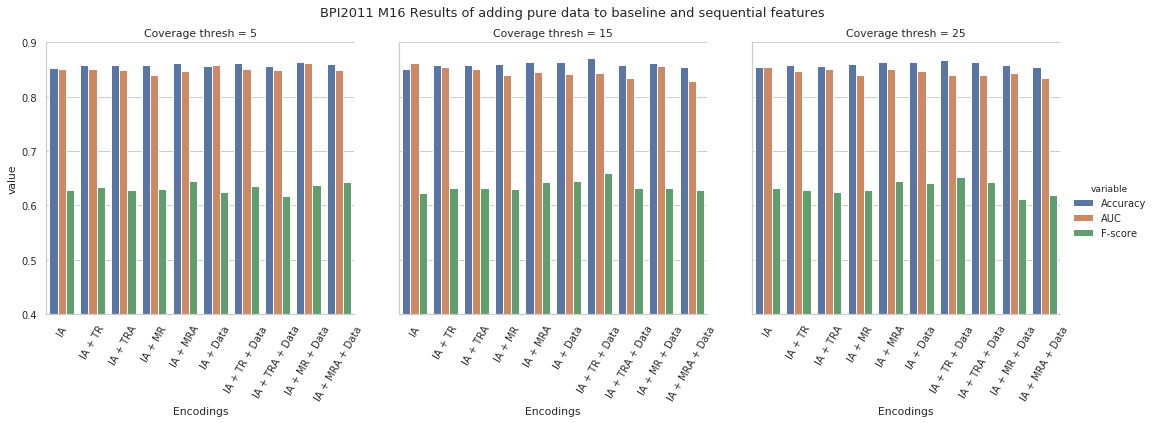

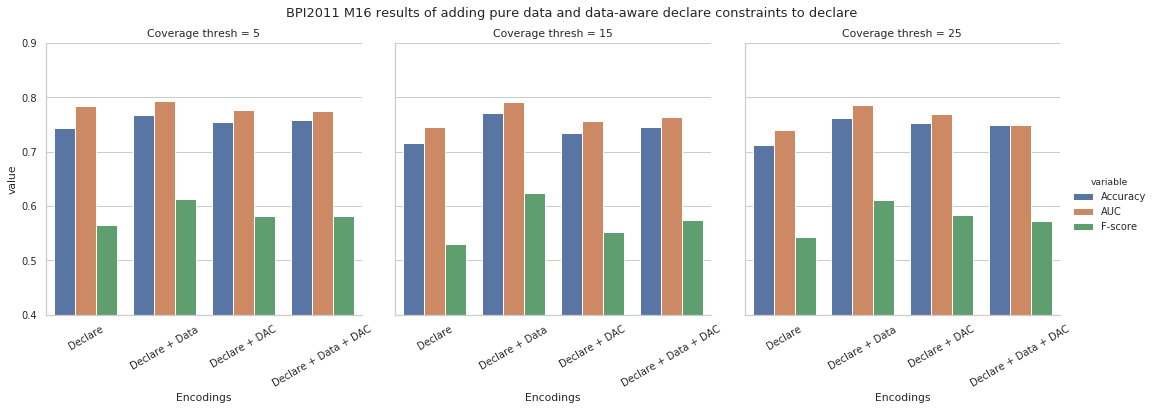

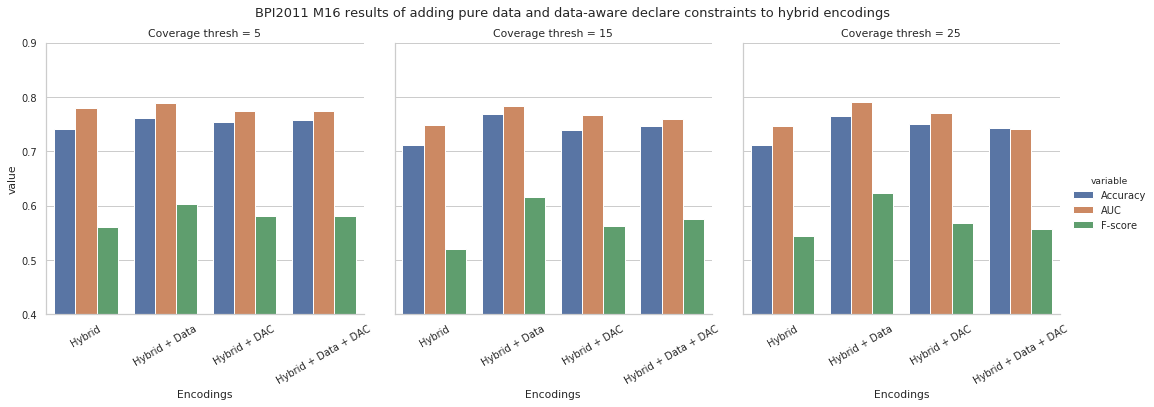

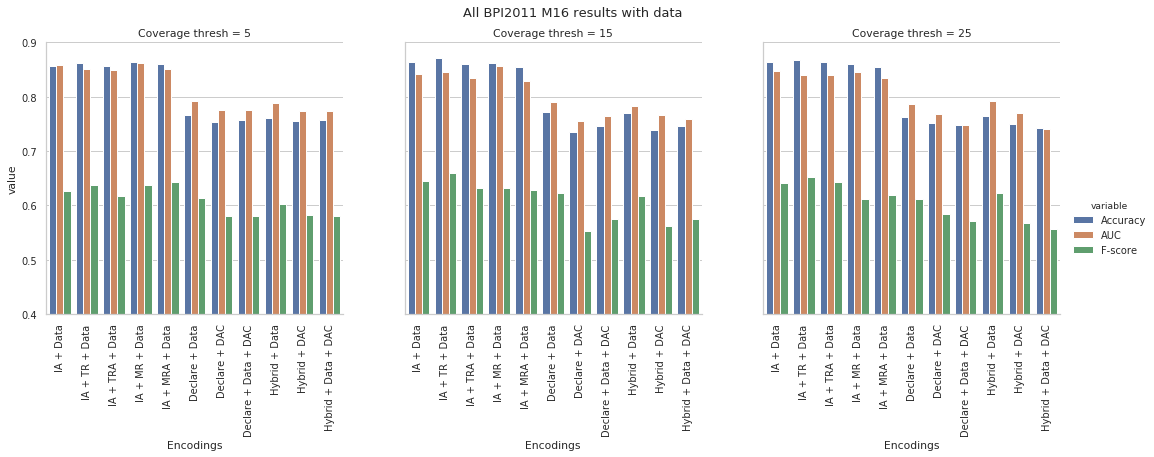

/home/joonas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/joonas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/joonas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

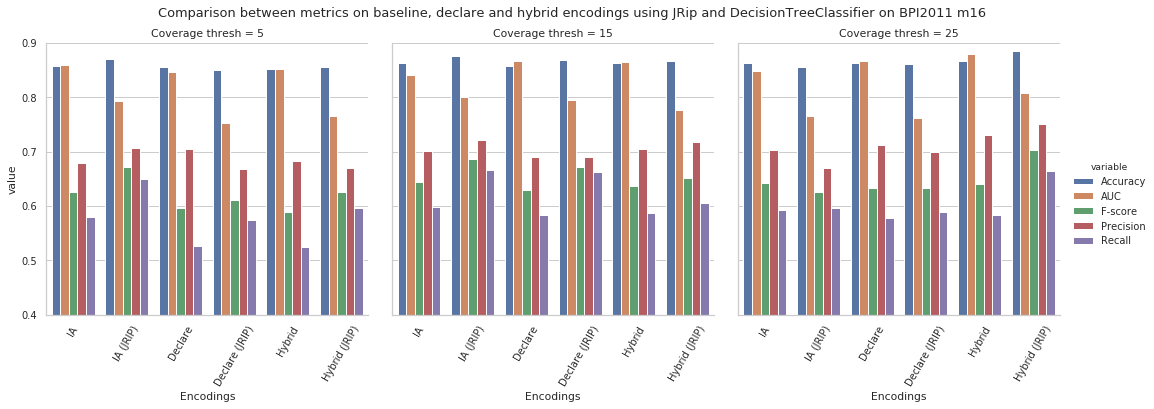

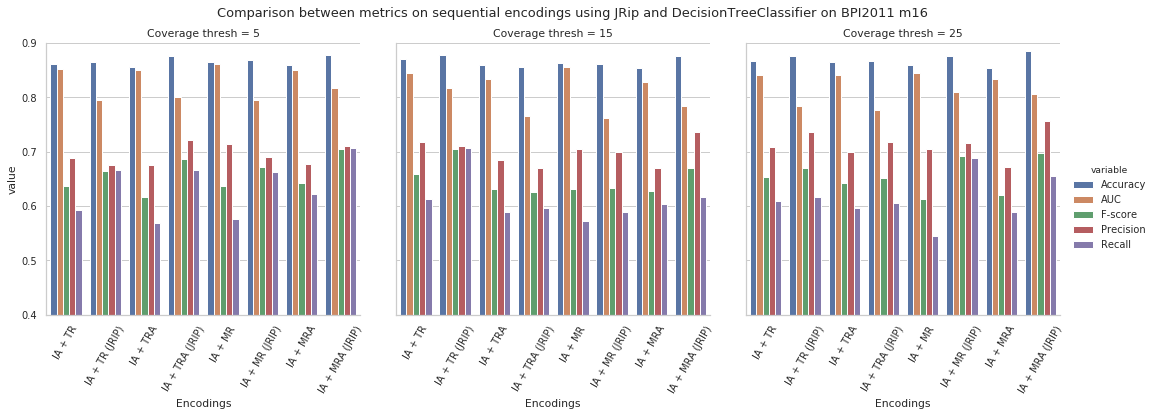

In [4]:
data_csv = "Downloads/bpi2011m16_data.csv"
dwd_csv = "Downloads/bpi2011m16_dad.csv"
normal_csv = "Downloads/bpi2011m16.csv"
jrip_csv = "Downloads/bpi2011m16_data_jrip.csv"


sns.set()

sns.set_style("whitegrid")

bpi2011cc = pd.read_csv(normal_csv)
kept2011cc = bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]

data_bpi2011cc = pd.read_csv(data_csv)
data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]

res = pd.concat([kept2011cc, data_kept2011cc])

# Compare Seq + IA
seq_features = ["IA", "IA + Data", "IA + TR", "IA + TR + Data", "IA + TRA", "IA + TRA + Data", 
                "IA + MR", "IA + MR + Data", "IA + MRA", "IA + MRA + Data"]
#sns.set_style("dark")
seq_comparison = res[res.Encodings.isin(seq_features)]
sns.set(font_scale=0.9)  # crazy big
#ia_comparison = ia_comparison.set_index(["Encodings", "Coverage thresh"])

seq_melted = pd.melt(seq_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])
sns.set_style("whitegrid")

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=seq_melted, kind="bar", row_order=seq_features)
ax.set(ylim=(0.4, 0.9))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 M16 Results of adding pure data to baseline and sequential features')
plt.show()


data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#kept = kept.set_index(["Encodings", "Coverage thresh"])



declare_features = ["Declare", "Declare + Data", "Declare + DAC", "Declare + Data + DAC"]
#sns.set_style("dark")
declare_comparison = kept[kept.Encodings.isin(declare_features)]

declare_melted = pd.melt(declare_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=declare_melted, kind="bar")
ax.set(ylim=(0.4, 0.9))
ax.set_xticklabels(rotation=30)

#plt.tight_layout()

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 M16 results of adding pure data and data-aware declare constraints to declare')
plt.show()

data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#kept = kept.set_index(["Encodings", "Coverage thresh"])


declare_features = ["Hybrid", "Hybrid + Data", "Hybrid + DAC", "Hybrid + Data + DAC"]
#sns.set_style("dark")
declare_comparison = kept[kept.Encodings.isin(declare_features)]

declare_melted = pd.melt(declare_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=declare_melted, kind="bar")
ax.set(ylim=(0.4, 0.9))
ax.set_xticklabels(rotation=30)

#plt.tight_layout()

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 M16 results of adding pure data and data-aware declare constraints to hybrid encodings')
plt.show()



# Compare Seq + IA
seq_data_features = ["IA + Data", "IA + TR + Data", "IA + TRA + Data", 
                     "IA + MR + Data", "IA + MRA + Data"]

hybrid_data_features = ["Declare + Data", "Declare + DAC", "Declare + Data + DAC", 
                        "Hybrid + Data", "Hybrid + DAC", "Hybrid + Data + DAC"]



#res_new = pd.concat([kept2011cc, data_kept2011cc])


# 1 baseline, 4 from sequential, 3 from declare, 3 from hybrid, 11 columns?


data_bpi2011cc = pd.read_csv(data_csv)
data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
keep_seq = data_kept2011cc[data_kept2011cc.Encodings.isin(seq_data_features)]

data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
keep_hybrid = kept[kept.Encodings.isin(hybrid_data_features)]


concated = pd.concat([keep_seq, keep_hybrid])

concated_melted = pd.melt(concated, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=concated_melted, kind="bar")
ax.set(ylim=(0.4, 0.9))
ax.set_xticklabels(rotation=90)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('All BPI2011 M16 results with data')
plt.show()





feats_1_norip = ["IA + Data", "Declare + Data", "Hybrid + Data"]
feats_2_norip = ["IA + TR + Data", "IA + TRA + Data", 
           "IA + MR + Data", "IA + MRA + Data"]


norip_kept = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC", "Recall", "Precision"]]

norip_data_feats1 = norip_kept[norip_kept.Encodings.isin(feats_1_norip)]
norip_data_feats2 = norip_kept[norip_kept.Encodings.isin(feats_2_norip)]


norip_data_feats1["Encodings"] = norip_data_feats1.Encodings.str.replace(' + Data' , '', regex=False)
norip_data_feats2["Encodings"] = norip_data_feats2.Encodings.str.replace(' + Data' , '', regex=False)



#data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#keep_seq = data_kept2011cc[data_kept2011cc.Encodings.isin(seq_data_features)]



data_jrip = pd.read_csv(jrip_csv)
data_jrip["Accuracy"] = data_jrip["Accuracy"] / 100
data_jrip["Accuracy std"] = data_jrip["Accuracy std"] / 100

data_keptjrip = data_jrip[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC", "Recall", "Precision"]]

feats_1 = ["IA + Data (JRIP)", "Declare + Data (JRIP)", "Hybrid + Data (JRIP)"]
feats_2 = ["IA + TR + Data (JRIP)", "IA + TRA + Data (JRIP)", 
           "IA + MR + Data (JRIP)", "IA + MRA + Data (JRIP)"]


data_feats1 = data_keptjrip[data_keptjrip.Encodings.isin(feats_1)]
#data_feats1

data_feats2 = data_keptjrip[data_keptjrip.Encodings.isin(feats_2)]
#data_feats2


data_feats1["Encodings"] = data_feats1.Encodings.str.replace(' + Data' , '', regex=False)
data_feats2["Encodings"] = data_feats2.Encodings.str.replace(' + Data' , '', regex=False)


sns.set(font_scale=0.9)
sns.set_style("whitegrid")


concated = pd.concat([norip_data_feats1, data_feats1])

concated_melted = pd.melt(concated, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score", "Precision", "Recall"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=concated_melted, kind="bar",
                order=["IA", "IA (JRIP)", "Declare", 
                       "Declare (JRIP)","Hybrid","Hybrid (JRIP)"])
ax.set(ylim=(0.4, 0.9))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('Comparison between metrics on baseline, declare and hybrid encodings using JRip and DecisionTreeClassifier on BPI2011 m16')
plt.show()



concated = pd.concat([norip_data_feats2, data_feats2])

concated_melted = pd.melt(concated, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score", "Precision", "Recall"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=concated_melted, kind="bar",
                order=["IA + TR","IA + TR (JRIP)", "IA + TRA", "IA + TRA (JRIP)", 
           "IA + MR", "IA + MR (JRIP)", "IA + MRA", "IA + MRA (JRIP)"])
ax.set(ylim=(0.4, 0.9))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('Comparison between metrics on sequential encodings using JRip and DecisionTreeClassifier on BPI2011 m16')
plt.show()



# T101

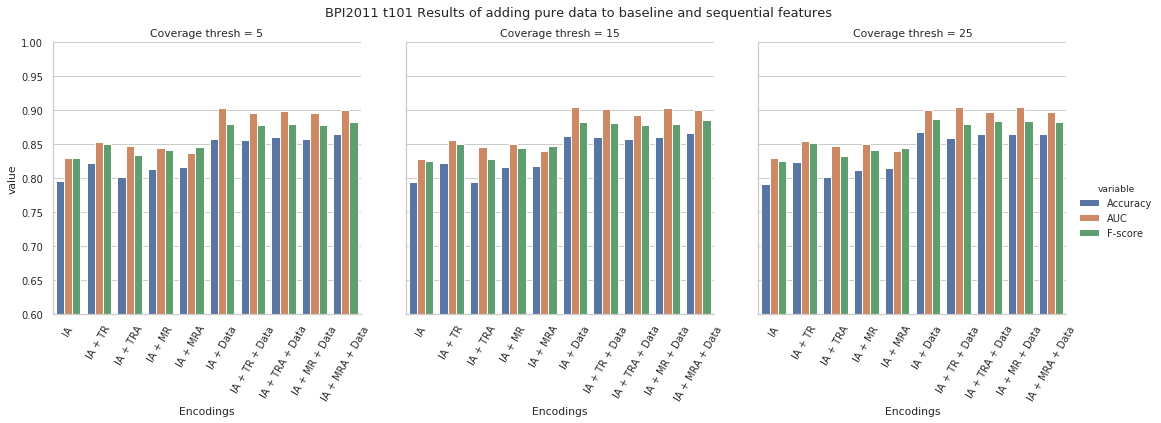

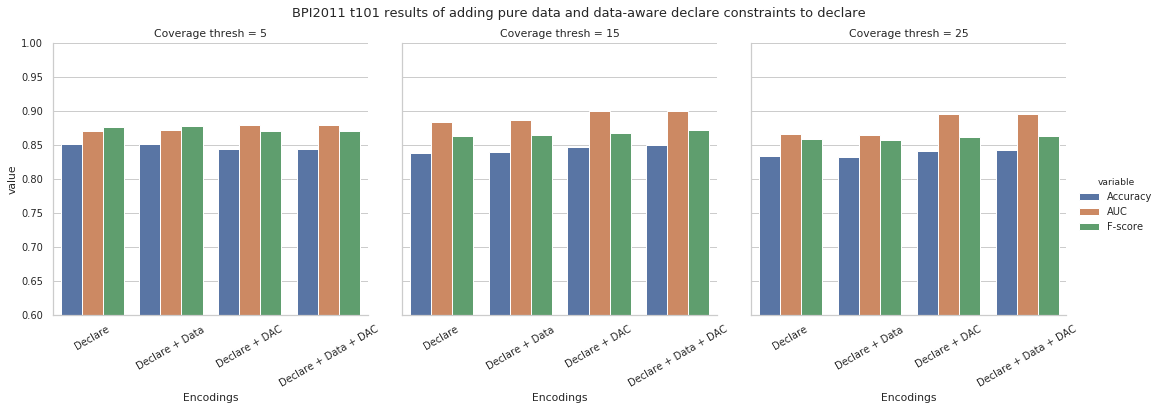

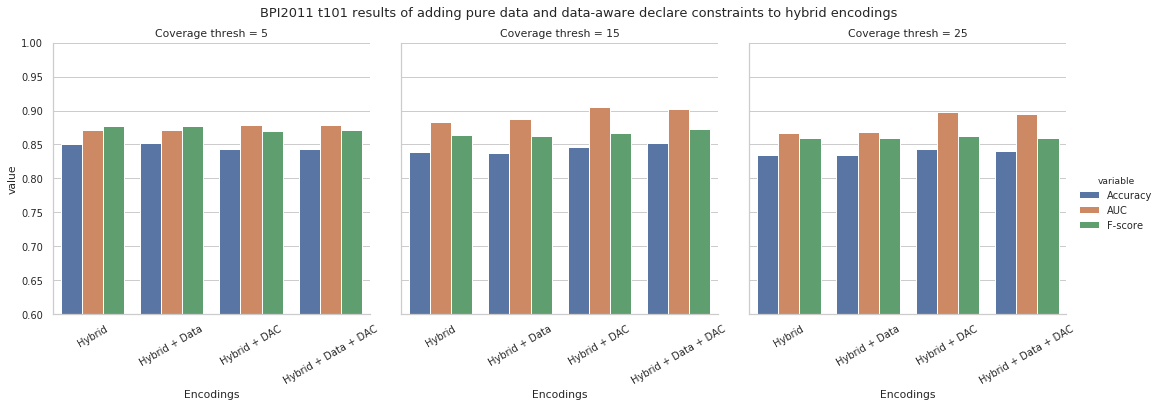

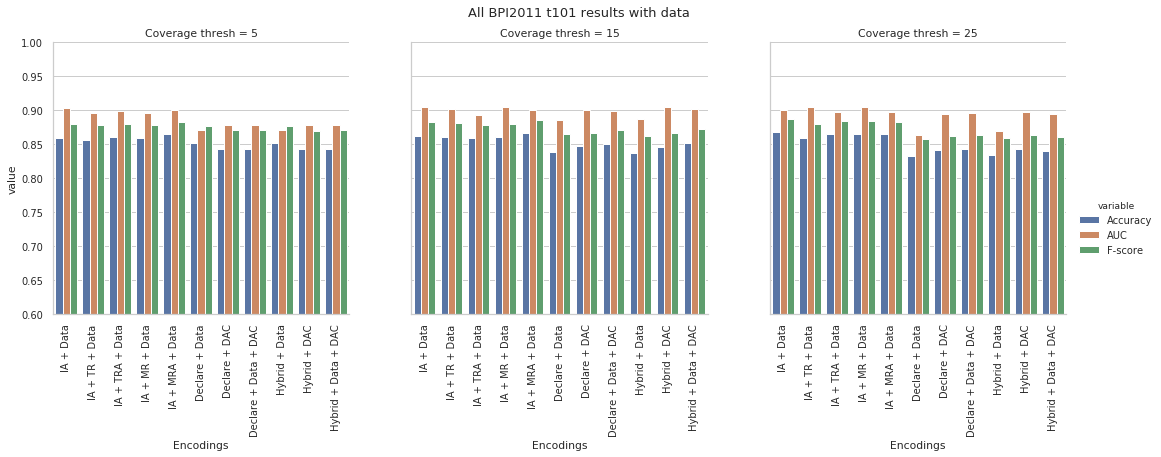

/home/joonas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/joonas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/joonas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

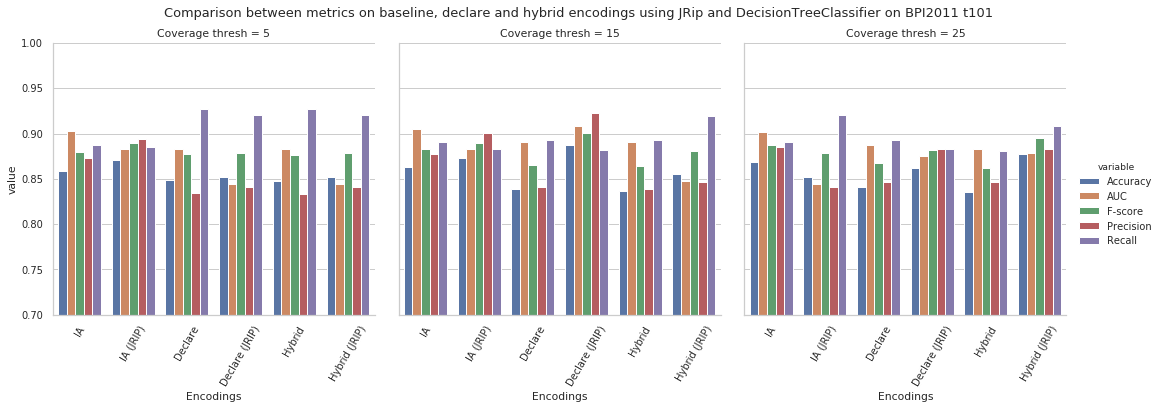

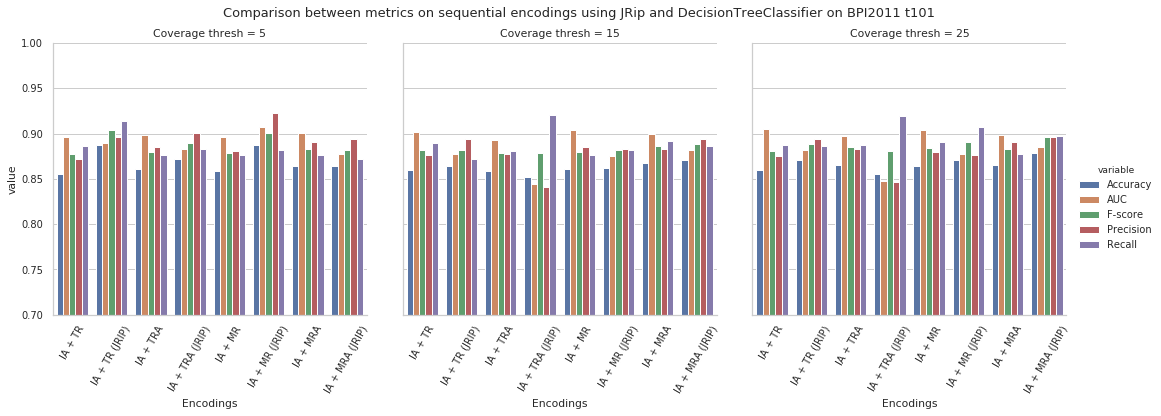

In [5]:
data_csv = "Downloads/bpi2011t101_data.csv"
dwd_csv = "Downloads/bpi2011t101_dad.csv"
normal_csv = "Downloads/bpi2011t101.csv"
jrip_csv = "Downloads/bpi2011t101_data_jrip.csv"


sns.set()

sns.set_style("whitegrid")

bpi2011cc = pd.read_csv(normal_csv)
kept2011cc = bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]

data_bpi2011cc = pd.read_csv(data_csv)
data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]

res = pd.concat([kept2011cc, data_kept2011cc])

# Compare IA
ia_features = ["IA", "IA + Data"]
ia_comparison = res[res.Encodings.isin(ia_features)]

ia_melted = pd.melt(ia_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])


# Compare Seq + IA
seq_features = ["IA", "IA + Data", "IA + TR", "IA + TR + Data", "IA + TRA", "IA + TRA + Data", 
                "IA + MR", "IA + MR + Data", "IA + MRA", "IA + MRA + Data"]
#sns.set_style("dark")
seq_comparison = res[res.Encodings.isin(seq_features)]
sns.set(font_scale=0.9)  # crazy big
#ia_comparison = ia_comparison.set_index(["Encodings", "Coverage thresh"])

seq_melted = pd.melt(seq_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])
sns.set_style("whitegrid")

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=seq_melted, kind="bar", row_order=seq_features)
ax.set(ylim=(0.6, 1))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 t101 Results of adding pure data to baseline and sequential features')
plt.show()


data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#kept = kept.set_index(["Encodings", "Coverage thresh"])



declare_features = ["Declare", "Declare + Data", "Declare + DAC", "Declare + Data + DAC"]
#sns.set_style("dark")
declare_comparison = kept[kept.Encodings.isin(declare_features)]

declare_melted = pd.melt(declare_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=declare_melted, kind="bar")
ax.set(ylim=(0.6, 1))
ax.set_xticklabels(rotation=30)

#plt.tight_layout()

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 t101 results of adding pure data and data-aware declare constraints to declare')
plt.show()

data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#kept = kept.set_index(["Encodings", "Coverage thresh"])


declare_features = ["Hybrid", "Hybrid + Data", "Hybrid + DAC", "Hybrid + Data + DAC"]
#sns.set_style("dark")
declare_comparison = kept[kept.Encodings.isin(declare_features)]

declare_melted = pd.melt(declare_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=declare_melted, kind="bar")
ax.set(ylim=(0.6, 1))
ax.set_xticklabels(rotation=30)

#plt.tight_layout()

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 t101 results of adding pure data and data-aware declare constraints to hybrid encodings')
plt.show()




# Compare Seq + IA
seq_data_features = ["IA + Data", "IA + TR + Data", "IA + TRA + Data", 
                     "IA + MR + Data", "IA + MRA + Data"]

hybrid_data_features = ["Declare + Data", "Declare + DAC", "Declare + Data + DAC", 
                        "Hybrid + Data", "Hybrid + DAC", "Hybrid + Data + DAC"]



#res_new = pd.concat([kept2011cc, data_kept2011cc])


# 1 baseline, 4 from sequential, 3 from declare, 3 from hybrid, 11 columns?


data_bpi2011cc = pd.read_csv(data_csv)
data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
keep_seq = data_kept2011cc[data_kept2011cc.Encodings.isin(seq_data_features)]

data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
keep_hybrid = kept[kept.Encodings.isin(hybrid_data_features)]


concated = pd.concat([keep_seq, keep_hybrid])

concated_melted = pd.melt(concated, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=concated_melted, kind="bar")
ax.set(ylim=(0.6, 1))
ax.set_xticklabels(rotation=90)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('All BPI2011 t101 results with data')
plt.show()





feats_1_norip = ["IA + Data", "Declare + Data", "Hybrid + Data"]
feats_2_norip = ["IA + TR + Data", "IA + TRA + Data", 
           "IA + MR + Data", "IA + MRA + Data"]


norip_kept = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC", "Recall", "Precision"]]

norip_data_feats1 = norip_kept[norip_kept.Encodings.isin(feats_1_norip)]
norip_data_feats2 = norip_kept[norip_kept.Encodings.isin(feats_2_norip)]


norip_data_feats1["Encodings"] = norip_data_feats1.Encodings.str.replace(' + Data' , '', regex=False)
norip_data_feats2["Encodings"] = norip_data_feats2.Encodings.str.replace(' + Data' , '', regex=False)



#data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#keep_seq = data_kept2011cc[data_kept2011cc.Encodings.isin(seq_data_features)]



data_jrip = pd.read_csv(jrip_csv)
data_jrip["Accuracy"] = data_jrip["Accuracy"] / 100
data_jrip["Accuracy std"] = data_jrip["Accuracy std"] / 100

data_keptjrip = data_jrip[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC", "Recall", "Precision"]]

feats_1 = ["IA + Data (JRIP)", "Declare + Data (JRIP)", "Hybrid + Data (JRIP)"]
feats_2 = ["IA + TR + Data (JRIP)", "IA + TRA + Data (JRIP)", 
           "IA + MR + Data (JRIP)", "IA + MRA + Data (JRIP)"]


data_feats1 = data_keptjrip[data_keptjrip.Encodings.isin(feats_1)]
#data_feats1

data_feats2 = data_keptjrip[data_keptjrip.Encodings.isin(feats_2)]
#data_feats2


data_feats1["Encodings"] = data_feats1.Encodings.str.replace(' + Data' , '', regex=False)
data_feats2["Encodings"] = data_feats2.Encodings.str.replace(' + Data' , '', regex=False)


sns.set(font_scale=0.9)
sns.set_style("whitegrid")


concated = pd.concat([norip_data_feats1, data_feats1])

concated_melted = pd.melt(concated, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score", "Precision", "Recall"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=concated_melted, kind="bar",
                order=["IA", "IA (JRIP)", "Declare", 
                       "Declare (JRIP)","Hybrid","Hybrid (JRIP)"])
ax.set(ylim=(0.7, 1))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('Comparison between metrics on baseline, declare and hybrid encodings using JRip and DecisionTreeClassifier on BPI2011 t101')
plt.show()



concated = pd.concat([norip_data_feats2, data_feats2])

concated_melted = pd.melt(concated, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score", "Precision", "Recall"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=concated_melted, kind="bar",
                order=["IA + TR","IA + TR (JRIP)", "IA + TRA", "IA + TRA (JRIP)", 
           "IA + MR", "IA + MR (JRIP)", "IA + MRA", "IA + MRA (JRIP)"])
ax.set(ylim=(0.7, 1))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('Comparison between metrics on sequential encodings using JRip and DecisionTreeClassifier on BPI2011 t101')
plt.show()



# Sepsis

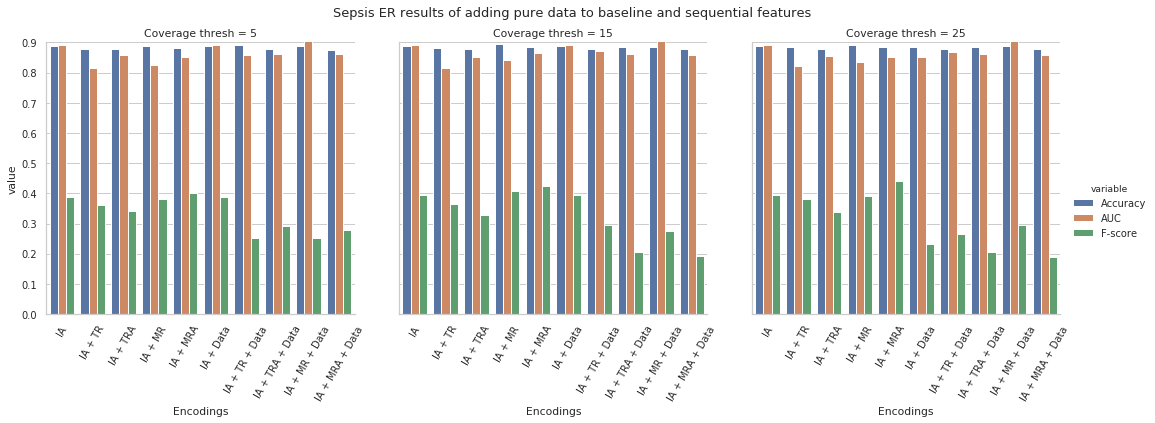

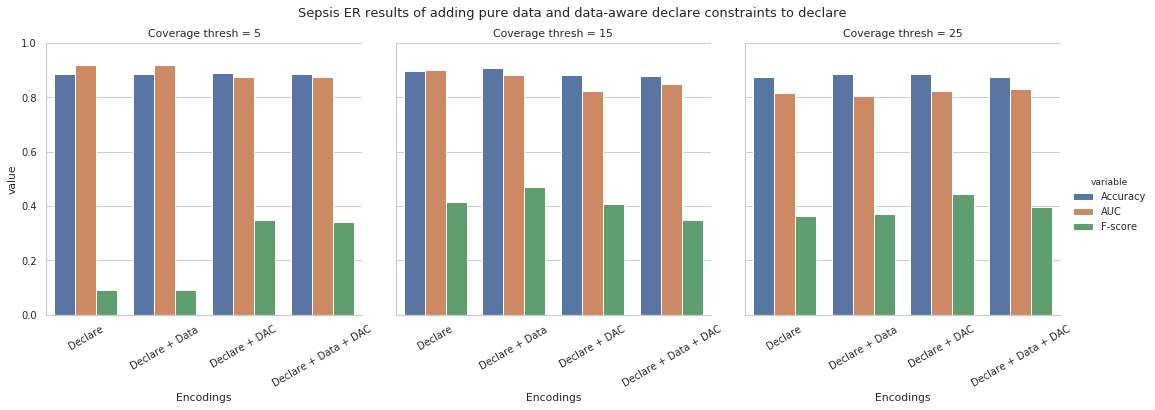

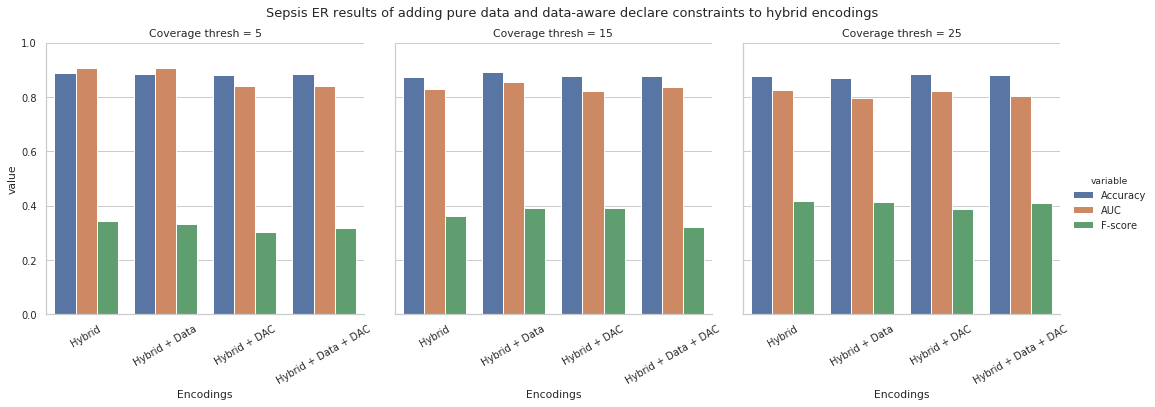

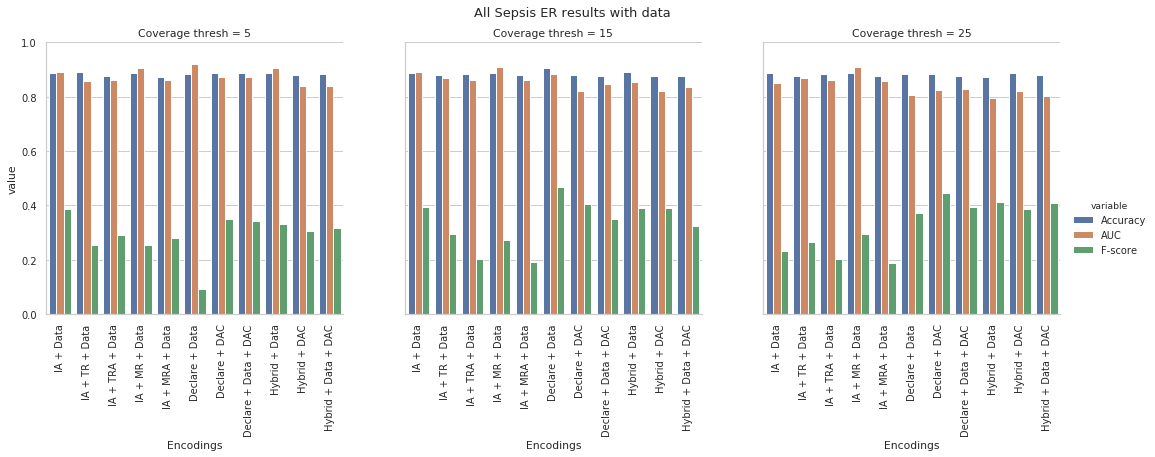

In [6]:
data_csv = "Downloads/sepsis_data.csv"
dwd_csv = "Downloads/sepsis_dad.csv"
normal_csv = "Downloads/sepsiser.csv"


sns.set()

sns.set_style("whitegrid")

bpi2011cc = pd.read_csv(normal_csv)
kept2011cc = bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]

data_bpi2011cc = pd.read_csv(data_csv)
data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]

res = pd.concat([kept2011cc, data_kept2011cc])

# Compare IA
ia_features = ["IA", "IA + Data"]
ia_comparison = res[res.Encodings.isin(ia_features)]

ia_melted = pd.melt(ia_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

# Compare Seq + IA
seq_features = ["IA", "IA + Data", "IA + TR", "IA + TR + Data", "IA + TRA", "IA + TRA + Data", 
                "IA + MR", "IA + MR + Data", "IA + MRA", "IA + MRA + Data"]
#sns.set_style("dark")
seq_comparison = res[res.Encodings.isin(seq_features)]
sns.set(font_scale=0.9)  # crazy big
#ia_comparison = ia_comparison.set_index(["Encodings", "Coverage thresh"])

seq_melted = pd.melt(seq_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])
sns.set_style("whitegrid")

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=seq_melted, kind="bar", row_order=seq_features)
ax.set(ylim=(0.0, 0.9))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('Sepsis ER results of adding pure data to baseline and sequential features')
plt.show()


data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#kept = kept.set_index(["Encodings", "Coverage thresh"])



declare_features = ["Declare", "Declare + Data", "Declare + DAC", "Declare + Data + DAC"]
#sns.set_style("dark")
declare_comparison = kept[kept.Encodings.isin(declare_features)]

declare_melted = pd.melt(declare_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=declare_melted, kind="bar")
ax.set(ylim=(0.0, 1))
ax.set_xticklabels(rotation=30)

#plt.tight_layout()

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('Sepsis ER results of adding pure data and data-aware declare constraints to declare')
plt.show()

data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
#kept = kept.set_index(["Encodings", "Coverage thresh"])


declare_features = ["Hybrid", "Hybrid + Data", "Hybrid + DAC", "Hybrid + Data + DAC"]
#sns.set_style("dark")
declare_comparison = kept[kept.Encodings.isin(declare_features)]

declare_melted = pd.melt(declare_comparison, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=declare_melted, kind="bar")
ax.set(ylim=(0.0, 1))
ax.set_xticklabels(rotation=30)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('Sepsis ER results of adding pure data and data-aware declare constraints to hybrid encodings')
plt.show()



# IA + Data, 
# MR + Data, TR + Data, MRA + Data, TRA + Data
## Above from pure DATA

# Declare + Data, Declare + DAC, Declare + Data + DAC,
# Hybrid + Data, Hybrid + DAC, Hybrid + Data + DAC
## Those from DAC data




# Compare Seq + IA
seq_data_features = ["IA + Data", "IA + TR + Data", "IA + TRA + Data", 
                     "IA + MR + Data", "IA + MRA + Data"]

hybrid_data_features = ["Declare + Data", "Declare + DAC", "Declare + Data + DAC", 
                        "Hybrid + Data", "Hybrid + DAC", "Hybrid + Data + DAC"]



#res_new = pd.concat([kept2011cc, data_kept2011cc])


# 1 baseline, 4 from sequential, 3 from declare, 3 from hybrid, 11 columns?


data_bpi2011cc = pd.read_csv(data_csv)
data_kept2011cc = data_bpi2011cc[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
keep_seq = data_kept2011cc[data_kept2011cc.Encodings.isin(seq_data_features)]

data = pd.read_csv(dwd_csv)
kept = data[["Encodings", "Coverage thresh", "Accuracy", "F-score", "AUC"]]
keep_hybrid = kept[kept.Encodings.isin(hybrid_data_features)]


concated = pd.concat([keep_seq, keep_hybrid])

concated_melted = pd.melt(concated, id_vars=["Encodings", "Coverage thresh"], value_vars=["Accuracy", "AUC", "F-score"])

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=concated_melted, kind="bar")
ax.set(ylim=(0.0, 1))
ax.set_xticklabels(rotation=90)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('All Sepsis ER results with data')
plt.show()


# Finding best results of all data

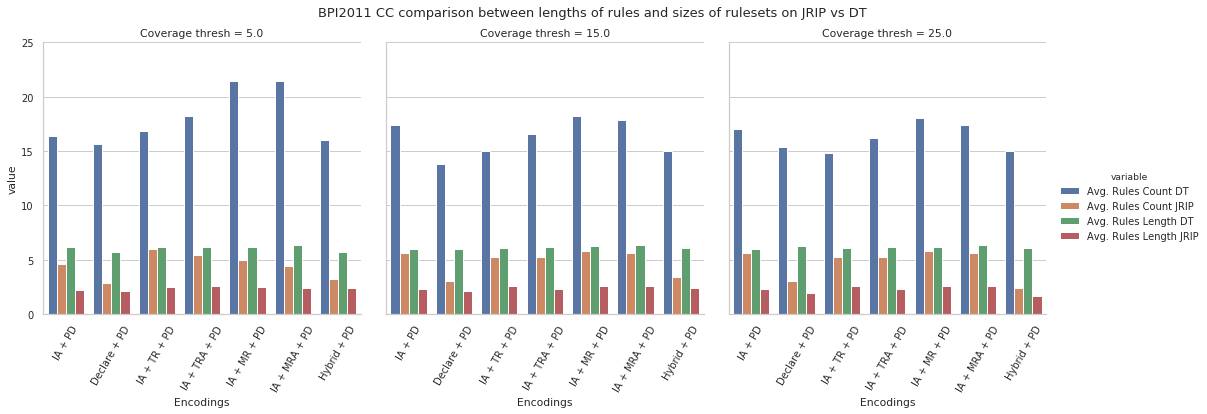

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

ruleset_file = "Downloads/bpi2011cc_ruleset.csv"

sns.set()

sns.set_style("whitegrid")




bpi2011cc = pd.read_csv(ruleset_file)
bpi2011cc = bpi2011cc.rename(columns = {'Avg Rules DT':'Avg. Rules Count DT',
                            'Avg Len DT':'Avg. Rules Length DT',
                            'Avg Rules JRIP ':'Avg. Rules Count JRIP',
                            'Avg Len JRIP':'Avg. Rules Length JRIP'
                           })


sns.set(font_scale=0.9) 

melted = pd.melt(bpi2011cc, id_vars=["Encodings", "Coverage thresh"], value_vars=["Avg. Rules Count DT","Avg. Rules Count JRIP",
                                                                                  "Avg. Rules Length DT", "Avg. Rules Length JRIP"])
sns.set_style("whitegrid")

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=melted, kind="bar",
                row_order=["Avg. Rules Count DT", "Avg. Rules Count JRIP", "Avg. Rules Length DT", 'Avg. Rules Length JRIP'])
ax.set(ylim=(0, 25))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 CC comparison between lengths of rules and sizes of rulesets on JRIP vs DT')
plt.show()



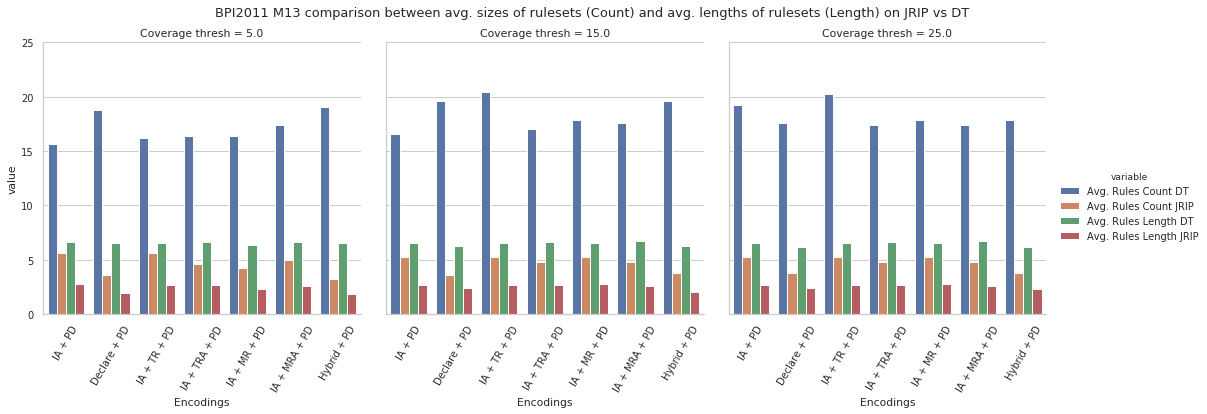

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

ruleset_file = "Downloads/bpi2011m13_ruleset.csv"

sns.set()

sns.set_style("whitegrid")




bpi2011cc = pd.read_csv(ruleset_file)
bpi2011cc = bpi2011cc.rename(columns = {'Avg Rules DT':'Avg. Rules Count DT',
                            'Avg Len DT':'Avg. Rules Length DT',
                            'Avg Rules JRIP ':'Avg. Rules Count JRIP',
                            'Avg Len JRIP':'Avg. Rules Length JRIP'
                           })


sns.set(font_scale=0.9) 

melted = pd.melt(bpi2011cc, id_vars=["Encodings", "Coverage thresh"], value_vars=["Avg. Rules Count DT","Avg. Rules Count JRIP",
                                                                                  "Avg. Rules Length DT", "Avg. Rules Length JRIP"])
sns.set_style("whitegrid")

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=melted, kind="bar",
                row_order=["Avg. Rules Count DT", "Avg. Rules Count JRIP", "Avg. Rules Length DT", 'Avg. Rules Length JRIP'])
                #palette=[sns.xkcd_rgb["red wine"], sns.xkcd_rgb["blue blue"], sns.xkcd_rgb["red orange"], sns.xkcd_rgb["cyan"]]
#)
ax.set(ylim=(0, 25))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 M13 comparison between avg. sizes of rulesets (Count) and avg. lengths of rulesets (Length) on JRIP vs DT')
plt.show()



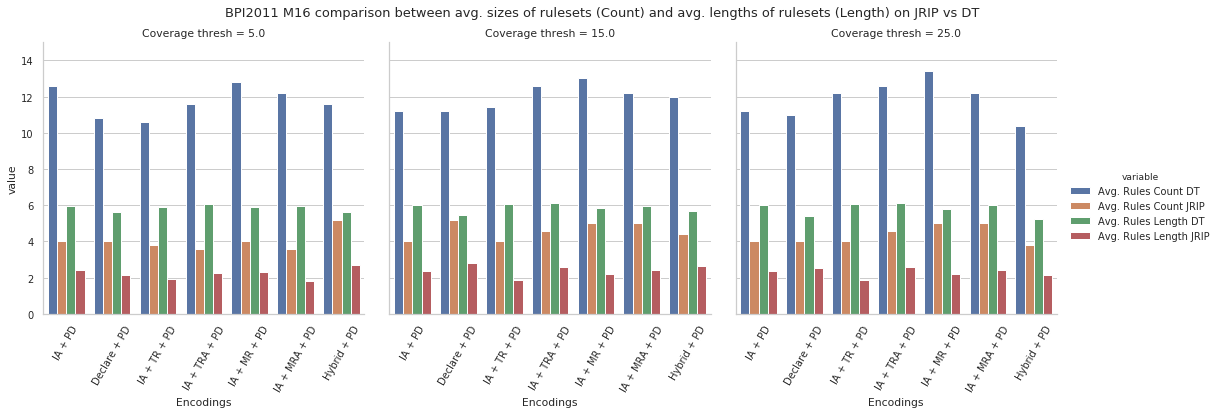

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

ruleset_file = "Downloads/bpi2011m16_ruleset.csv"

sns.set()

sns.set_style("whitegrid")




bpi2011cc = pd.read_csv(ruleset_file)
bpi2011cc = bpi2011cc.rename(columns = {'Avg Rules DT':'Avg. Rules Count DT',
                            'Avg Len DT':'Avg. Rules Length DT',
                            'Avg Rules JRIP ':'Avg. Rules Count JRIP',
                            'Avg Len JRIP':'Avg. Rules Length JRIP'
                           })


sns.set(font_scale=0.9) 

melted = pd.melt(bpi2011cc, id_vars=["Encodings", "Coverage thresh"], value_vars=["Avg. Rules Count DT","Avg. Rules Count JRIP",
                                                                                  "Avg. Rules Length DT", "Avg. Rules Length JRIP"])

sns.set_style("whitegrid")

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=melted, kind="bar",
                row_order=["Avg. Rules Count DT", "Avg. Rules Count JRIP", "Avg. Rules Length DT", 'Avg. Rules Length JRIP'])
ax.set(ylim=(0, 15))
ax.set_xticklabels(rotation=60)

plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 M16 comparison between avg. sizes of rulesets (Count) and avg. lengths of rulesets (Length) on JRIP vs DT')
plt.show()



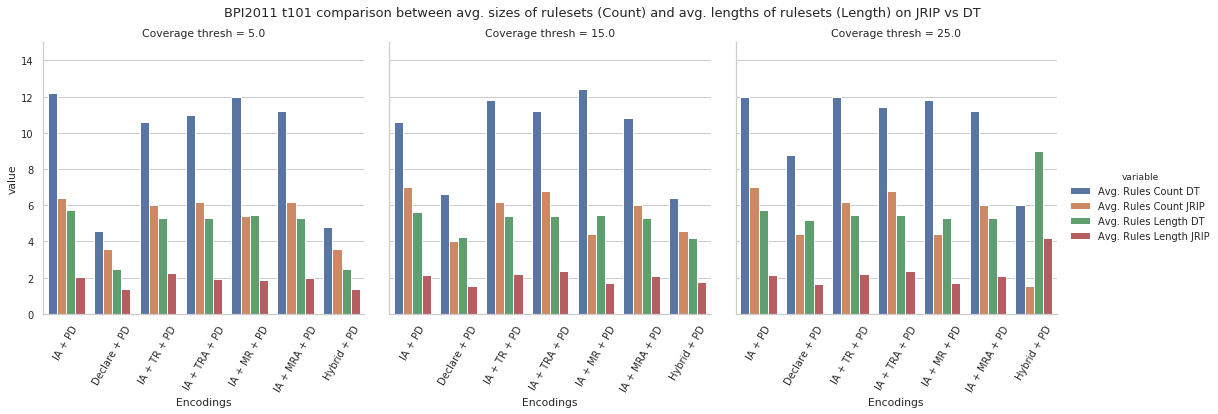

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

ruleset_file = "Downloads/bpi2011t101_ruleset.csv"

sns.set()

sns.set_style("whitegrid")




bpi2011cc = pd.read_csv(ruleset_file)
bpi2011cc = bpi2011cc.rename(columns = {'Avg Rules DT':'Avg. Rules Count DT',
                            'Avg Len DT':'Avg. Rules Length DT',
                            'Avg Rules JRIP ':'Avg. Rules Count JRIP',
                            'Avg Len JRIP':'Avg. Rules Length JRIP'
                           })


sns.set(font_scale=0.9) 


melted = pd.melt(bpi2011cc, id_vars=["Encodings", "Coverage thresh"], value_vars=["Avg. Rules Count DT","Avg. Rules Count JRIP",
                                                                                  "Avg. Rules Length DT", "Avg. Rules Length JRIP"])


sns.set_style("whitegrid")

ax = sns.catplot(x="Encodings", col="Coverage thresh", y="value", hue="variable", data=melted, kind="bar",
                row_order=["Avg. Rules Count DT", "Avg. Rules Count JRIP", "Avg. Rules Length DT", 'Avg. Rules Length JRIP'])
ax.set(ylim=(0, 15))
ax.set_xticklabels(rotation=60)



plt.subplots_adjust(top=0.88)
ax.fig.suptitle('BPI2011 t101 comparison between avg. sizes of rulesets (Count) and avg. lengths of rulesets (Length) on JRIP vs DT')
plt.show()

